<a href="https://colab.research.google.com/github/Kaustabh2001/NASSCOM/blob/main/Neural_Regression_Model_with_medical_bills.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import plot_model
import pandas as pd

In [ ]:
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#Encoding our datafram like female to 1 and male to 0, that is one hot endcoding the data
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
Y=insurance_one_hot["charges"]
Y=tf.constant(Y)

In [ ]:
X=tf.constant(insurance_one_hot)
X=tf.concat([X[:,:3],X[:,4:]],axis=1)#Here axis 1 means adding along column and axis 0 means adding along 1
X

<tf.Tensor: shape=(1338, 11), dtype=float64, numpy=
array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])>

In [ ]:
#Creating the training and test data
cut=int(0.7*1338)
Y_train=Y[:cut]
X_train=X[:cut]
Y_test=Y[cut:]
X_test=X[cut:]

In [ ]:
#Splitting data with sklearn
from sklearn.model_selection import train_test_split
X=insurance_one_hot.drop("charges",axis=1)
Y=insurance_one_hot["charges"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
X_train=tf.constant(X_train)
X_test=tf.constant(X_test)
Y_train=tf.constant(Y_train)
Y_test=tf.constant(Y_test)

NameError: ignored

In [ ]:
#Building model
tf.random.set_seed(42)
#1.Structure Creation of model
model=tf.keras.Sequential([tf.keras.layers.Dense(10,activation="linear")])
model.add(tf.keras.layers.Dense(100,activation="linear"))
model.add(tf.keras.layers.Dense(100,activation="linear"))
model.add(tf.keras.layers.Dense(1,activation="linear"))
#2.Compiling the model
model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(lr=0.001),metrics="mae")
#model.summary()
#3.Fitting the model to the training data
history=model.fit(X_train,Y_train,epochs=200)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/200
13/13 [==============================] - 1s 3ms/step - loss: 12811.2070 - mae: 12811.2070
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 12691.0752 - mae: 12691.0752
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 12456.0098 - mae: 12456.0098
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 11970.7012 - mae: 11970.7012
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 11019.7393 - mae: 11019.7393
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 9558.4980 - mae: 9558.4980
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 7929.4351 - mae: 7929.4351
Epoch 8/200
13/13 [==============================] - 0s 3ms/step - loss: 7285.8521 - mae: 7285.8521
Epoch 9/200
13/13 [==============================] - 0s 3ms/step - loss: 7257.7930 - mae: 7257.7930
Epoch 10/200
13/13 [==============================] - 0s 3ms/step - loss: 7175.7373 - mae:

In [ ]:
model.evaluate(X_test,Y_test)

30/30 [==============================] - 0s 1ms/step - loss: 3787.8052 - mae: 3787.8052


[3787.80517578125, 3787.80517578125]

Text(0, 0.5, 'loss')

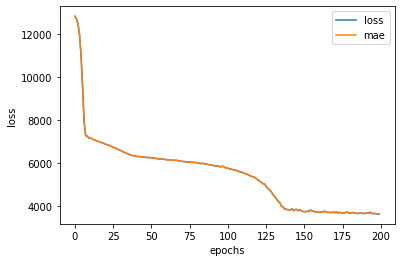

In [ ]:
#Plotting loss curve
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

### Feature Scalling and Mean Normalization

In [ ]:
insurance_scalled=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
#create column transformer
ct=make_column_transformer((MinMaxScaler(),["age","bmi","children"]),
                           (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]))
X=insurance_scalled.drop("charges",axis=1)
Y=insurance_scalled["charges"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
#fit column transformer to training data
ct.fit(X_train)
#Transform training and test data with normalization and one hot encoder
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)#Data has been normalized and one hot encoded

In [ ]:
#Creating another model
#1.Build the model
model2=tf.keras.Sequential([tf.keras.layers.Dense(20,input_shape=[11])])
model2.add(tf.keras.layers.Dense(20))
model2.add(tf.keras.layers.Dense(10))
model2.add(tf.keras.layers.Dense(1))
#2.Compile the model
model2.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(lr=0.001),metrics="mae")
#model.summary()
#3.Fitting the model to the training data
history2=model2.fit(X_train_normal,Y_train,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
30/30 [==============================] - 0s 2ms/step - loss: 13378.2744 - mae: 13378.2744
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 13373.7891 - mae: 13373.7891
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 13362.2627 - mae: 13362.2627
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 13331.3701 - mae: 13331.3701
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 13256.8877 - mae: 13256.8877
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 13098.7832 - mae: 13098.7832
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 12802.2412 - mae: 12802.2412
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 12302.2637 - mae: 12302.2637
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 11553.2832 - mae: 11553.2832
Epoch 10/100
30/30 [==============================] - 0s 2ms/step - loss: 10638.77

In [ ]:
#Evaluating model
model2.evaluate(X_test_normal,Y_test)

13/13 [==============================] - 0s 2ms/step - loss: 3295.1729 - mae: 3295.1729


[3295.1728515625, 3295.1728515625]

Text(0, 0.5, 'loss')

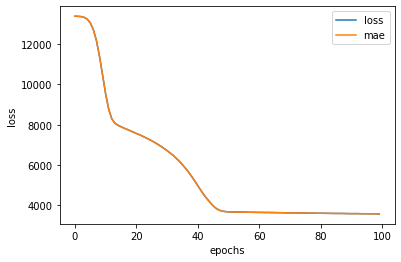

In [ ]:
pd.DataFrame(history2.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")